<a href="https://colab.research.google.com/github/rmDL4SON/Git_Practice/blob/main/CNN_And_Transfer_Learning_Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Modern_CompVision/Malaria-Detection/Dataset/Train'
valid_path = '/content/drive/MyDrive/Modern_CompVision/Malaria-Detection/Dataset/Test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# imagenet trained million of images

vgg19.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [6]:
# Don't train existing weights, since we are going to use the same transfer learning, so only last layers will be trained.
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes

folders = glob('/content/drive/MyDrive/Modern_CompVision/Malaria-Detection/Dataset/Train/*')

In [8]:
folders

['/content/drive/MyDrive/Modern_CompVision/Malaria-Detection/Dataset/Train/Uninfected',
 '/content/drive/MyDrive/Modern_CompVision/Malaria-Detection/Dataset/Train/Parasite']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',  # two node at the last, if binary then use binary_crossentropy
  optimizer='adam',
  metrics=['accuracy'] # This is classification problem accuracy metrics is best to use.
)


In [16]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Modern_CompVision/Malaria-Detection/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [18]:
training_set

In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Modern_CompVision/Malaria-Detection/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,  # number of fwd and backpropagations during the training, in this case with batch size = 32 we need 13 iterations per epoch.
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

#model.fit.generator is deprecated

Epoch 1/50
13/13 [==============================] - 126s 9s/step - loss: 2.5378 - accuracy: 0.4832 - val_loss: 1.1920 - val_accuracy: 0.3209
Epoch 2/50
13/13 [==============================] - 5s 364ms/step - loss: 0.7207 - accuracy: 0.5481 - val_loss: 0.7205 - val_accuracy: 0.3358
Epoch 3/50
13/13 [==============================] - 5s 365ms/step - loss: 0.5922 - accuracy: 0.6683 - val_loss: 0.7687 - val_accuracy: 0.3433
Epoch 4/50
13/13 [==============================] - 5s 364ms/step - loss: 0.5326 - accuracy: 0.7260 - val_loss: 1.0062 - val_accuracy: 0.3358
Epoch 5/50
13/13 [==============================] - 5s 365ms/step - loss: 0.4876 - accuracy: 0.7692 - val_loss: 0.9935 - val_accuracy: 0.3060
Epoch 6/50
13/13 [==============================] - 5s 363ms/step - loss: 0.4564 - accuracy: 0.7909 - val_loss: 0.9142 - val_accuracy: 0.3209
Epoch 7/50
13/13 [==============================] - 5s 363ms/step - loss: 0.4358 - accuracy: 0.7788 - val_loss: 1.1281 - val_accuracy: 0.3955
Epoch 8

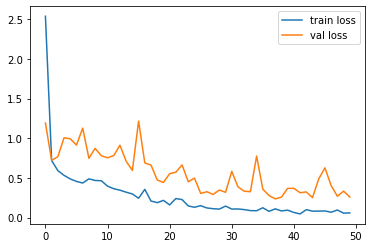

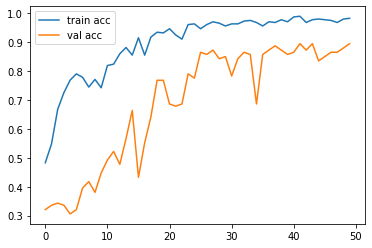

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [23]:

y_pred = model.predict(test_set)


In [24]:
y_pred

array([[4.76329997e-02, 9.52367067e-01],
       [9.99767363e-01, 2.32634469e-04],
       [9.99937773e-01, 6.21687068e-05],
       [1.93681002e-01, 8.06318998e-01],
       [5.51265925e-02, 9.44873452e-01],
       [9.99958515e-01, 4.14499045e-05],
       [3.17630582e-02, 9.68236923e-01],
       [9.99998331e-01, 1.62153572e-06],
       [3.98087800e-02, 9.60191250e-01],
       [1.01690004e-02, 9.89831030e-01],
       [6.78908825e-02, 9.32109058e-01],
       [9.89765823e-01, 1.02341548e-02],
       [1.00000000e+00, 1.89678584e-09],
       [1.00000000e+00, 1.59890330e-12],
       [9.97217059e-01, 2.78286939e-03],
       [3.95830944e-02, 9.60416913e-01],
       [3.00210655e-01, 6.99789345e-01],
       [9.22649130e-02, 9.07735109e-01],
       [1.00000000e+00, 9.11892841e-18],
       [1.71525609e-02, 9.82847452e-01],
       [1.00000000e+00, 5.15142200e-11],
       [5.15618473e-02, 9.48438108e-01],
       [9.97836888e-01, 2.16315035e-03],
       [9.99950886e-01, 4.91644823e-05],
       [7.241007

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1) # axis =1 is reading the highest value per row

In [26]:
y_pred

# 0 means parasited image

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_vgg19.h5')

In [29]:
img=image.load_img('/content/drive/MyDrive/Modern_CompVision/Malaria-Detection/Dataset/Test/Uninfected/3.png',target_size=(224,224))



In [30]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

In [36]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
